In [211]:
# Import and parse data 
import re
r = []
with open('./input.txt', 'r') as file:
    for line in file:
        letters = re.findall(r'[a-zA-Z]+', line)
        r.append(letters)

In [213]:
# Create a Component Class for each component
class Component:
    def __init__(self, name, pos_x=0, pos_y =0):
        self.name = name
        self.links = set()
        self.pos_x = pos_x
        self.pos_y = pos_y
    
    def change_pos(self, new_pos_x, new_pos_y):
        self.pos_x += new_pos_x
        self.pos_y += new_pos_y

In [214]:
# Imports so that we can find an array of unique components in our data

import numpy
import operator
import functools
unique_components =  numpy.unique(functools.reduce(operator.add, r))

# Create a component for each of the unique components present
for k in range (len(unique_components)):
    globals()[unique_components[k]]= Component(name = unique_components[k])

In [215]:
# Add links between the components 

for i in range(0, len(r)):
    for k in range(1,len(r[i])):
        globals()[r[i][0]].links.add(r[i][k])
        globals()[r[i][k]].links.add(r[i][0])
    

In [ ]:
# Print the list of all the unique components and their links to other components
for k in range (len(unique_components)):
    print(f' Component {globals()[unique_components[k]].name} : {globals()[unique_components[k]].links}')
    

In [217]:
# Function to travel through the list of components using a starting point and travelling through the links

def parcours(origin, mover, sign) :
    tasks = []
    chain = set()
    tasks.append(origin)
    tasks = numpy.array(tasks)
    c=0
    while len(tasks)>0:
        
        for link in globals()[tasks[0]].links :
           
            if link not in chain:
                c+=1
                chain.add(link)
                #tasks.append(link)
                tasks = numpy.append(tasks, link)
                globals()[link].change_pos(mover, c)
        tasks = numpy.delete(tasks, 0)
        
        # We model the structure in 2 dimensions, pulling the linked components towards a direction on the x axis 

        if sign == "+":
            mover -= 100
        else:
            mover += 100
            
    # Return the length of our chain         
    return (len(chain))

In [218]:
# Resets all positions to 0 

def reset_clusters():
    for i in range(0, len(unique_components)):
        globals()[unique_components[i]].pos_x = 0
        globals()[unique_components[i]].pos_y = 0

In [219]:
reset_clusters()
parcours('lsr', 1000, "+")
parcours('xhk', -1000, '-' )

767

In [220]:
len(unique_components)

1475

In [ ]:
for k in range (len(unique_components)):
    print( unique_components[k] , globals()[unique_components[k]].pos_x)


c=0
for k in range (len(unique_components)):
    if globals()[unique_components[k]].pos_x <= 500:
        c+=1



In [112]:
def get_clusters(i,j):
    
    parcours(unique_components[i], 1000, "+")
    parcours(unique_components[j], -1000, '-' ) 
    
    c=0
    for k in range (len(unique_components)):
        if globals()[unique_components[k]].pos_x <= 500:
            c+=1
   
    
    if 0.30<c/len(unique_components)<0.70:
        return (c, len(unique_components)-c)


In [113]:
unique_components

array(['bbb', 'bbg', 'bbh', ..., 'zzc', 'zzf', 'zzn'], dtype='<U3')

In [115]:
import matplotlib.pyplot as plt

def comp_plotter():
    
    # List of components for plotting
    components = []
    
    for k in range (len(unique_components)):
        components.append(globals()[unique_components[k]])
       
    # Extract names and positions for plotting
    names = [component.name for component in components]
    X_positions = [component.pos_x for component in components]
    y_positions = [component.pos_y for component in components]

    plt.scatter(X_positions, y_positions , marker='o', color='b')


    for name, pos, pos2 in zip(names, X_positions, y_positions):
        plt.text(pos+10, pos2 , name)

    plt.grid(True)
    plt.show()


In [198]:
import matplotlib.pyplot as plt

def link_plotter():
    plt.figure(figsize=(10, 80)) 
    

    for k in range(len(unique_components)):
        for link in globals()[unique_components[k]].links:
            a = [globals()[unique_components[k]].pos_x, globals()[unique_components[k]].pos_y]
            b = [globals()[link].pos_x, globals()[link].pos_y]

            x_values = [a[0], b[0]]
            y_values = [a[1], b[1]]

            plt.plot(x_values, y_values, 'bo', linestyle="--")
     
    components = []  
    for k in range (len(unique_components)):
        components.append(globals()[unique_components[k]])
       
    # Extract names and positions for plotting
    names = [component.name for component in components]
    X_positions = [component.pos_x for component in components]
    y_positions = [component.pos_y for component in components]

    plt.scatter(X_positions, y_positions , marker='o', color='r')


    for name, pos, pos2 in zip(names, X_positions, y_positions):
        plt.text(pos+10, pos2+10 , name, color = 'r')
    
    
    plt.grid(True)
    plt.show()


## hlt jbq

In [199]:
reset_clusters()
parcours('hlt', 1000000000, "+")
parcours('pbf', -100000000, '-' )

1475

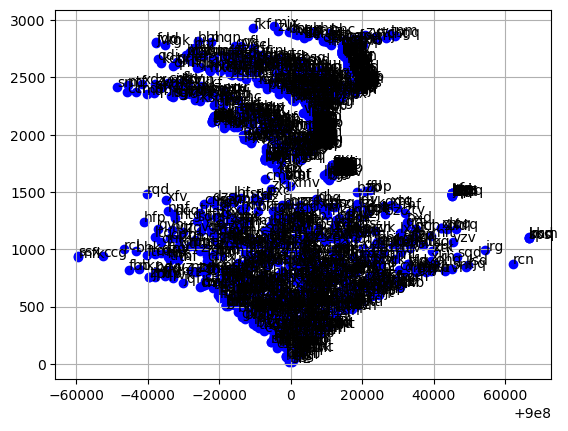

In [200]:
comp_plotter()

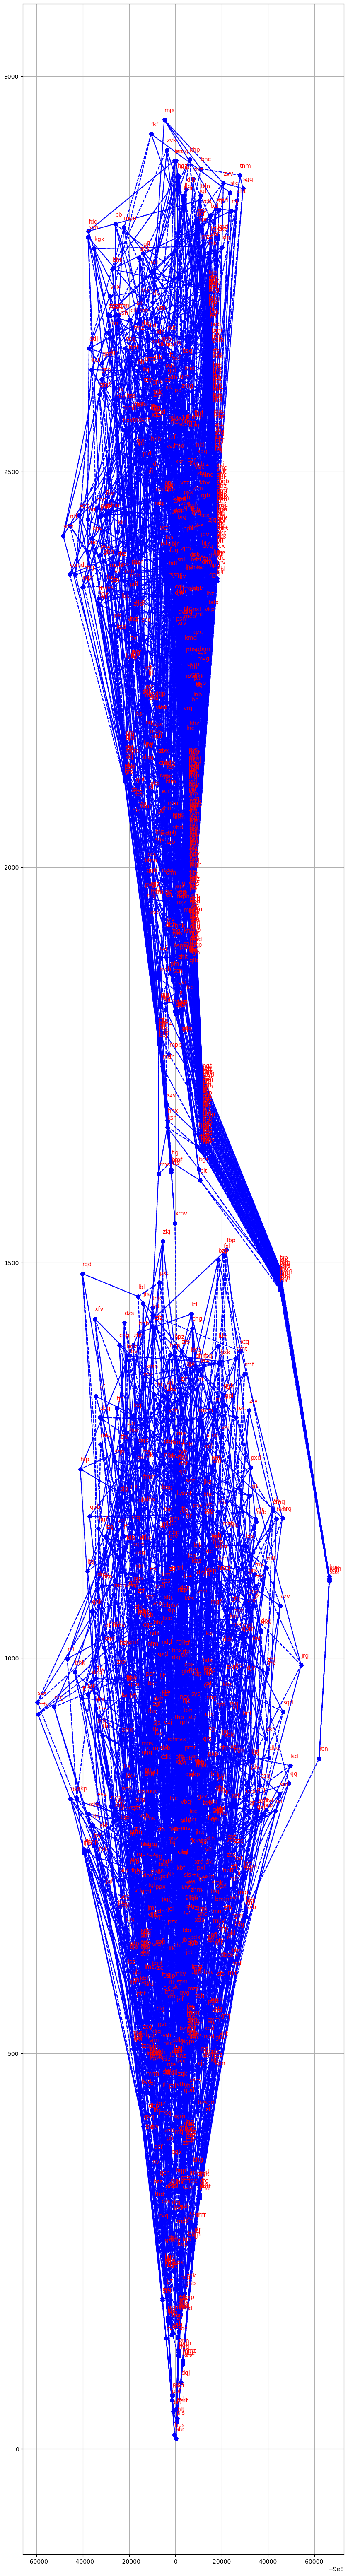

In [201]:
link_plotter()

LIST OF COMPONENTS TO EXAMINE : xmv rcn cms

In [207]:
print(xmv.pos_y)
for link in xmv.links:
    print (link , globals()[link].pos_y)

1550
vts 1614
kmt 1616
bmf 1618
dht 1234


In [208]:
print (rcn.pos_y)
for link in rcn.links:
    print (link , globals()[link].pos_y)

873
xkf 681
sps 1097
bcd 1099
xkm 1101
lmq 1103


In [209]:
print (cms.pos_y)
for link in cms.links:
    print (link , globals()[link].pos_y)

1612
bcj 1776
bfh 1778
ksh 1671
tlg 1627
thk 1443


 # Now we Remove these links and rerun the parcours function
 
 cms - thk
 
 rcn - xkf 
 
 xmv - dht

In [210]:
# Import and parse data 
import re
r = []
with open('./input.txt', 'r') as file:
    for line in file:
        letters = re.findall(r'[a-zA-Z]+', line)
        r.append(letters)

In [223]:
1475-767 #Unique components - new amount of components on one chain

708

In [224]:
708*767 # Multiply the size of each group together

543036